Total points for this HW: 100.

Please note: **Copying and pasting other people's work is absolutely prohibited**. Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.


<span style='color:red'>  pts</span>

In [2]:
from IPython.display import Image
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Q1 KNN (35 points)   <span style='color:red'>  pts</span>

Given a dataset with 53,414 points in "HW3Q1.txt" which is KEGG Metabolic Relation Network (Directed) Data Set
https://archive.ics.uci.edu/ml/datasets/KEGG+Metabolic+Relation+Network+%28Directed%29, you should ignore the first column which is not real value and focus on columns 2 to 24.

a) implement the function of Euclidean distance, test it on the first two points in the given dataset, and output the distance. (10 points)

In [ ]:
# your answers here
kegg = pd.read_csv('HW3Q1.txt', header=None).drop(columns=[0])
kegg.head()

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
0,26,43,2,7,1,211,3.222749,3.230769,0,0,...,27.000000,0,0.076923,3.307692,0.062418,1.653846,3.923077,0.375199,2.210114,0.221154
1,27,52,2,10,1,226,3.411504,3.851852,0,0,...,26.629630,0,0.000000,3.851852,0.036567,1.925926,4.074074,0.399880,2.168687,0.290197
2,26,53,2,6,1,202,2.732673,3.769231,0,0,...,14.961538,0,0.230769,4.076923,0.026604,2.038462,3.115385,0.430368,1.864288,0.230311
3,20,28,1,8,1,65,2.523077,2.600000,0,0,...,4.950000,0,0.100000,2.800000,0.014474,1.400000,2.450000,0.481044,1.492500,0.210000
4,15,33,1,4,2,85,1.858824,4.400000,0,0,...,5.000000,0,0.000000,4.400000,0.026740,2.200000,2.333333,0.518691,1.532326,0.267222


In [ ]:
kegg.shape

(53413, 23)

In [ ]:
def euclidean_distance(X, Y):
    
    dist = np.sqrt(np.sum((X - Y)**2))
    
    return dist

euclidean_distance(kegg.iloc[0], kegg.iloc[1])

17.837937709396147

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(np.array(kegg.loc[0]).reshape(1, -1), np.array(kegg.loc[1]).reshape(1, -1))

array([[17.83793771]])

b) given the first point as query, implement the baseline (slide 10 of lecture 8) which scans every point in the rest of the file, return the nearest neighbor to the query. In the end, output the resulted point and the distance to the query. (10 points)

In [ ]:
# your answers here

def nearest_neighbor(query, dataset, k):
    
    dist_all = []
    for i in dataset:
        d = euclidean_distance(query, i)
        dist_all.append(d)

    idx = np.argsort(dist_all)[:k] 
    dist = list(map(dist_all.__getitem__, idx))
    
    return dist, idx

dist, idx = nearest_neighbor(kegg.iloc[0], kegg.iloc[1:].values.tolist(), k=1)

# +1 to get the index in original dataframe
print('index:{}, distance:{}.'.format(int(idx+1), float(dist[0])))

index:45834, distance:12.466167487557819.


c) implement the index acceleration using Ball-tree, and present the nearest neighbor of the first point (to call the library of Ball-tree, refer to: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html) (10 points)

In [ ]:
# your answers here

from sklearn.neighbors import BallTree
tree = BallTree(kegg.loc[1:], metric='euclidean')
dist, idx = tree.query(np.array(kegg.loc[0]).reshape(1, -1), k=1, return_distance=True)

# +1 to get the index in original dataframe
print('index:{}, distance:{}.'.format(int(idx+1), float(dist)))

index:45834, distance:12.466167487557817.


d) compare the running time of the above two methods you have implemented (to measure the running time, refer to
https://stackoverflow.com/questions/1557571/how-do-i-get-time-of-a-python-programs-execution) (5 points)

In [3]:
# your answers here
import time

In [ ]:
start_time = time.time()
dist, idx = nearest_neighbor(kegg.iloc[0], kegg.iloc[1:].values.tolist(), k=1)

print("--- %s seconds ---" % (time.time() - start_time))

--- 25.954408884048462 seconds ---


In [ ]:
start_time = time.time()
tree = BallTree(kegg.loc[1:])
dists, idxs = tree.query(np.array(kegg.loc[0]).reshape(1, -1), k=1, return_distance=True)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.37964534759521484 seconds ---


Ball-tree is much faster.

### Q2. Trajectory Distance Metric and KNN (35 points)  <span style='color:red'>  pts</span>

In this question, we use a dataset with 1114 trajectories in Porto, Portugal: "HW3Q2.csv" for trajectory distance computation and kNN. (To access the full dataset, refer to https://archive.ics.uci.edu/ml/datasets/Taxi+Service+Trajectory+-+Prediction+Challenge,+ECML+PKDD+2015)

a) implement DTW and test it on the first two trajectories in the file, and output the distance. (5 points)

In [1]:
# your answers here
import re

data = []
f = open("HW3Q2.txt", "r")
for x in f:
    line = re.findall(r"[-+]?\d*\.\d+|\d+", x)[1:]
    data.append(line)
    
# data = np.array(data).reshape(1114, -1)
data

[['-8.639847',
  '41.159826',
  '-8.640351',
  '41.159871',
  '-8.642196',
  '41.160114',
  '-8.644455',
  '41.160492',
  '-8.646921',
  '41.160951',
  '-8.649999',
  '41.161491',
  '-8.653167',
  '41.162031',
  '-8.656434',
  '41.16258',
  '-8.660178',
  '41.163192',
  '-8.663112',
  '41.163687',
  '-8.666235',
  '41.1642',
  '-8.669169',
  '41.164704',
  '-8.670852',
  '41.165136',
  '-8.670942',
  '41.166576',
  '-8.66961',
  '41.167962',
  '-8.668098',
  '41.168988',
  '-8.66664',
  '41.170005',
  '-8.665767',
  '41.170635',
  '-8.66574',
  '41.170671'],
 ['-8.615907',
  '41.140557',
  '-8.614449',
  '41.141088',
  '-8.613522',
  '41.14143',
  '-8.609904',
  '41.140827',
  '-8.609301',
  '41.139522',
  '-8.609544',
  '41.138865',
  '-8.610777',
  '41.137551',
  '-8.611452',
  '41.136012',
  '-8.610624',
  '41.134563',
  '-8.609319',
  '41.134446',
  '-8.608014',
  '41.1345',
  '-8.607987',
  '41.134536',
  '-8.607987',
  '41.134518',
  '-8.607861',
  '41.134536',
  '-8.60778',
  '4

In [6]:
len(data)

1114

In [8]:
from scipy.spatial import distance

def DTW(a, b): 
    a = np.array(a).astype('float64')
    b = np.array(b).astype('float64')
    an = a.size
    bn = b.size
    pointwise_distance = distance.cdist(a.reshape(-1,1),b.reshape(-1,1))
    cumdist = np.matrix(np.ones((an+1,bn+1)) * np.inf)
    cumdist[0,0] = 0

    for ai in range(an):
        for bi in range(bn):
            minimum_cost = np.min([cumdist[ai, bi+1],
                                   cumdist[ai+1, bi],
                                   cumdist[ai, bi]])
            cumdist[ai+1, bi+1] = pointwise_distance[ai,bi] + minimum_cost

    return cumdist[an, bn]

DTW(data[0], data[1]) # distance

1.4615640000000027

In [18]:
from tslearn.metrics import dtw

dtw(data[0], data[1]) # similarity score

0.2543116344055077

b) implement LCSS and test it on the first two trajectories in the file, by setting the threshold as 0.001, and output the similarity score. (5 points)

In [ ]:
pip install tslearn

In [11]:
# your answers here

from tslearn.metrics import lcss

lcss(data[0], data[1], 0.001) # similarity score

0.0

c) implement kNN of using a DTW and lCSS and test it using the first trajectory as query and the rest 1113 trajectories as the dataset. (10 points)

In [86]:
# your answers here

# knn dtw on distance
def knn_dtw(query, dataset, k=5):
  
    dtw_all = []
    x = query
    for y in dataset:
        d = DTW(x, y)
        dtw_all.append(d)
    
    idx = np.argsort(dtw_all)[:k]
    dtw = list(map(dtw_all.__getitem__, idx))

    return dtw, idx

knn_dtw(data[0], data[1:], k=1)

([0.25391700000001727], array([383]))

In [111]:
# Make the lists equal in length to avoid error. 
n = len(max(data, key=len))
data_2 = [x + [None]*(n-len(x)) for x in data]

In [87]:
# knn dtw on similarity score --> same result
from tslearn.neighbors import KNeighborsTimeSeries

knn = KNeighborsTimeSeries(n_neighbors=1, metric='dtw').fit(data_2[1:])
knn.kneighbors(np.array(data_2[0]).reshape(1, -1), return_distance=True)

(array([[0.04903973]]), array([[383]]))

In [100]:
# knn lcss on similarity score
def knn_lcss(query, dataset, k=5):
  
    from tslearn.metrics import lcss
  
    lcss_all = []
    x = query
    for y in dataset:
        l = lcss(x, y, 0.001)
        lcss_all.append(l)
    
    idx = np.argsort(lcss_all)[-k:][::-1] # top similarity score
    lcss = list(map(lcss_all.__getitem__, idx))

    return lcss, idx

knn_lcss(data[0], data[1:], k=1)

([0.868421052631579], array([716]))

d) compare the running time of two approaches by using the first trajectory as query, and check whether them return the same results by calling 5NN. (5 points)

In [101]:
# your answers here

start_time = time.time()

print(knn_dtw(data[0], data[1:], k=5))

print("--- %s seconds ---" % (time.time() - start_time))

([0.25391700000001727, 0.43882200000000005, 0.47816999999998444, 0.7880939999999956, 1.0594440000000063], array([383, 682,   7,  72, 689]))
--- 57.63662123680115 seconds ---


In [102]:
start_time = time.time()

print(knn_lcss(data[0], data[1:], k=5))

print("--- %s seconds ---" % (time.time() - start_time))

([0.868421052631579, 0.7894736842105263, 0.7105263157894737, 0.7, 0.6842105263157895], array([716, 854, 385, 794, 853]))
--- 0.2563507556915283 seconds ---


LCSS is much faster and their results are different.

e) visualize the query trajectory, and its 1NN and 5NN with LCSS using Scikit-learn mobility (https://github.com/scikit-mobility/scikit-mobility) (10 points)

In [ ]:
# skmob on colab
!apt-get install -qq curl g++ make
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
import os
os.chdir('spatialindex-src-1.8.5')
!./configure
!make
!make install
!pip install rtree
!ldconfig
!pip install scikit-mobility

In [ ]:
import skmob

In [191]:
# your answers here

# 1nn of lcss [716]
path1 = data[1:][716]

# get the latitude 
lat = pd.DataFrame(columns=['lat'])
for i in range(1, 214, 2):
    lat.at[i, 'lat'] = path1[i]
lat = lat.astype('float64').reset_index()

# get the longitude 
lon = pd.DataFrame(columns=['lon'])
for i in range(0, 214, 2):
    lon.at[i, 'lon'] = path1[i]
lon = lon.astype('float64').reset_index()

# concat
path1_df = pd.concat([lat[['lat']], lon[['lon']]], axis=1)
path1_df['date'] = pd.to_datetime('2021-08-18') # assign a date
path1_df.head()

# plot
tdf = skmob.TrajDataFrame(path1_df, latitude='lat', longitude='lon', datetime='date')
print(tdf.head())
tdf.plot_trajectory(zoom=13, weight=3, opacity=0.9, tiles='Stamen Toner')

         lat       lng   datetime
0  41.145633 -8.607186 2021-08-18
1  41.145651 -8.607213 2021-08-18
2  41.145939 -8.607033 2021-08-18
3  41.146470 -8.606934 2021-08-18
4  41.146596 -8.606871 2021-08-18


In [189]:
# 5nn lcss [716, 854, 385, 794, 853]
path_5nn = pd.DataFrame()

for idx in [716, 854, 385, 794, 853]:
  
    # data list
    path = data[1:][idx]
    n = len(path)

    # get the latitude 
    lat = pd.DataFrame(columns=['lat'])
    for i in range(1, n, 2):
    lat.at[i, 'lat'] = path[i]
    lat = lat.astype('float64').reset_index()

    # get the longitude 
    lon = pd.DataFrame(columns=['lon'])
    for i in range(0, n, 2):
    lon.at[i, 'lon'] = path[i]
    lon = lon.astype('float64').reset_index()

    # concat
    path_df = pd.concat([lat[['lat']], lon[['lon']]], axis=1)
    path_df['date'] = pd.to_datetime('2020-01-01') + pd.Timedelta(days=idx) # assign different date to each path
    path_df['id'] = idx

    path_5nn = pd.concat([path_5nn, path_df])

    path_5nn

,lat,lon,date,id
0,41.145633,-8.607186,2021-12-17,716
1,41.145651,-8.607213,2021-12-17,716
2,41.145939,-8.607033,2021-12-17,716
3,41.146470,-8.606934,2021-12-17,716
4,41.146596,-8.606871,2021-12-17,716
...,...,...,...,...
104,41.175693,-8.668251,2022-05-03,853
105,41.175693,-8.668242,2022-05-03,853
106,41.175684,-8.668251,2022-05-03,853
107,41.175684,-8.668251,2022-05-03,853


In [190]:
tdf = skmob.TrajDataFrame(path_5nn, latitude='lat', longitude='lon', datetime='date', user_id='id')
print(tdf.head())
tdf.plot_trajectory(zoom=13, weight=3, opacity=0.9, tiles='Stamen Toner')

         lat       lng   datetime  uid
0  41.145633 -8.607186 2021-12-17  716
1  41.145651 -8.607213 2021-12-17  716
2  41.145939 -8.607033 2021-12-17  716
3  41.146470 -8.606934 2021-12-17  716
4  41.146596 -8.606871 2021-12-17  716


### Q3. Clustering: Spatial and Temporal Distributions of Chicago Crimes (30 points)  <span style='color:red'>  pts</span>

In this question you will use k-means clustering in sklearn to answer the question, “Do different types of crime display different trends over space and time?”  The dataset “HW3Q3_1.csv” consists of data for 119 different types of crime, each of which occurred at least 100 times in Chicago during the year 2016.  For each crime type, we have various features representing the spatial and temporal distribution of crime, including:

- The proportion of all crimes of that type that occurred on each day of the week (day_Sun, day_Mon, …, day_Sat).

- The proportion of all crimes of that type that occurred on each hour of the day (hour_0 = midnight to 12:59am, hour_1 = 1am to 1:59am, …, hour_23 = 11pm to 11:59pm).

- The proportion of all crime of that type that occurred in each of the 77 community areas of Chicago (community_area_1 … community_area_77).

We also have, for each crime type, its categorization by the FBI:

- Category = “P1V” corresponds to Part 1 Violent Crime, i.e., serious violent crimes

- Category = “P1P” corresponds to Part 1 Property Crime, i.e., serious property crimes

- Category = “P2” corresponds to Part 2 (less serious) crimes.

To answer parts a through f, you should cluster the 119 crime types using k-means into k = 3 clusters using only the hour of day (hour_0..hour_23) attributes.

a) Copy each cluster’s mean values for hour_0…hour_23 into a DataFrame and create a line graph to visualize these values by cluster.  (5 pts)

b) Describe the three different hour-of-day trends represented by these three clusters (5 pts).

c) Do you notice any consistent trends about which crime types are assigned to which cluster?  Note that by a "crime type", we are referring to specific crimes such as "narcotics" or "assault", not the FBI categories. (5 pts)  

d) Do the three clusters have different day-of-week trends?  Again, visualize the trends for each cluster by creating a line graph and discuss any notable differences.  (5 pts)

e) Do the three clusters affect different types of communities/neighborhoods?  To answer this question, you could first compute the proportions of "cluster 1", "cluster 2", and "cluster 3" crimes for each community area, and identify particular community areas with disproportionate amounts of a given cluster.  You can then use the provided file (HW3Q3_2.csv), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.).  You may also wish to consult the Chicago Community Areas map at https://en.wikipedia.org/wiki/Community_areas_in_Chicago. (5 pts)

f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes? (5 pts)



In [ ]:
data3=pd.read_csv("HW3Q3_1.csv")
data3.head()

,crime_type,Category,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,hour_0,...,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77
0,ARSON: BY FIRE,P1P,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0.073654,...,0.019830,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,P2,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,0.055556,...,0.037037,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407
2,ASSAULT: AGGRAVATED: HANDGUN,P1V,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,0.040630,...,0.035377,0.031524,0.013310,0.042732,0.002102,0.017863,0.000000,0.012259,0.002102,0.003152
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,P1V,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000,0.034000,...,0.028000,0.030000,0.014000,0.037000,0.003000,0.010000,0.002000,0.002000,0.003000,0.006000
4,ASSAULT: AGGRAVATED: OTHER FIREARM,P1V,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275,0.009804,...,0.029412,0.019608,0.009804,0.019608,0.000000,0.000000,0.000000,0.009804,0.000000,0.000000


In [ ]:
data4=pd.read_csv("HW3Q3_2.csv")
data4.head()

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
0,1,Rogers Park,1164399.219,1947666.815,7.7,23.6,8.7,18.2,27.5,23939,11.870556,3420
1,2,West Ridge,1158307.200,1943243.722,7.8,17.2,8.8,20.8,38.5,23040,9.870385,3068
2,3,Uptown,1168228.082,1930980.022,3.8,24.0,8.9,11.8,22.2,35787,8.672137,3330
3,4,Lincoln Square,1159618.804,1933105.743,3.4,10.9,8.2,13.4,25.5,37524,8.600422,1859
4,5,North Center,1161104.228,1924056.010,0.3,7.5,5.2,4.5,26.2,57123,10.100636,1280


In [ ]:
# your answers here

a) Copy each cluster’s mean values for hour_0…hour_23 into a DataFrame and create a line graph to visualize these values by cluster. (5 pts)

In [ ]:
col = data3.columns.tolist()[9:33]
col

['hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23']

In [ ]:
hourOfDay = data3[col]
hourOfDay.head()

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.073654,0.079320,0.076487,0.087819,0.082153,0.073654,0.039660,0.033994,0.014164,0.016997,...,0.019830,0.019830,0.025496,0.022663,0.022663,0.053824,0.033994,0.033994,0.042493,0.062323
1,0.055556,0.070370,0.033333,0.014815,0.025926,0.003704,0.007407,0.014815,0.018519,0.029630,...,0.055556,0.077778,0.048148,0.059259,0.044444,0.044444,0.077778,0.044444,0.074074,0.044444
2,0.040630,0.039580,0.033275,0.036778,0.018564,0.014011,0.012609,0.021366,0.025569,0.034676,...,0.055342,0.052189,0.059895,0.056392,0.062347,0.051839,0.053240,0.066550,0.055692,0.056042
3,0.034000,0.026000,0.018000,0.009000,0.010000,0.015000,0.020000,0.017000,0.033000,0.036000,...,0.045000,0.058000,0.073000,0.078000,0.068000,0.066000,0.059000,0.038000,0.051000,0.041000
4,0.009804,0.009804,0.029412,0.009804,0.009804,0.019608,0.039216,0.019608,0.000000,0.029412,...,0.029412,0.009804,0.107843,0.117647,0.058824,0.068627,0.078431,0.068627,0.049020,0.088235


In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
hour_fit = km.fit(hourOfDay)
hour_fit.labels_

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 0, 0, 2, 1,
       2, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 2], dtype=int32)

In [ ]:
hourOfDay['cluster'] = hour_fit.labels_
hourOfDay.head()

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,cluster
0,0.073654,0.079320,0.076487,0.087819,0.082153,0.073654,0.039660,0.033994,0.014164,0.016997,...,0.019830,0.025496,0.022663,0.022663,0.053824,0.033994,0.033994,0.042493,0.062323,0
1,0.055556,0.070370,0.033333,0.014815,0.025926,0.003704,0.007407,0.014815,0.018519,0.029630,...,0.077778,0.048148,0.059259,0.044444,0.044444,0.077778,0.044444,0.074074,0.044444,0
2,0.040630,0.039580,0.033275,0.036778,0.018564,0.014011,0.012609,0.021366,0.025569,0.034676,...,0.052189,0.059895,0.056392,0.062347,0.051839,0.053240,0.066550,0.055692,0.056042,0
3,0.034000,0.026000,0.018000,0.009000,0.010000,0.015000,0.020000,0.017000,0.033000,0.036000,...,0.058000,0.073000,0.078000,0.068000,0.066000,0.059000,0.038000,0.051000,0.041000,0
4,0.009804,0.009804,0.029412,0.009804,0.009804,0.019608,0.039216,0.019608,0.000000,0.029412,...,0.009804,0.107843,0.117647,0.058824,0.068627,0.078431,0.068627,0.049020,0.088235,0


In [ ]:
hourCenters = pd.DataFrame(hour_fit.cluster_centers_)
hourCenters.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.055336,0.043513,0.039342,0.032912,0.026224,0.019519,0.019987,0.022354,0.025688,0.031652,...,0.039742,0.044332,0.049522,0.052044,0.056343,0.056156,0.062032,0.058117,0.062016,0.055071
1,0.044360,0.014031,0.013011,0.011519,0.010991,0.009537,0.014675,0.027938,0.049322,0.083782,...,0.062674,0.069178,0.061814,0.053835,0.048769,0.042037,0.034381,0.027277,0.024446,0.020979
2,0.023647,0.016779,0.009479,0.004833,0.002836,0.001149,0.003519,0.009543,0.015754,0.028660,...,0.058471,0.046579,0.043873,0.048573,0.077095,0.104700,0.081691,0.070758,0.060220,0.036565


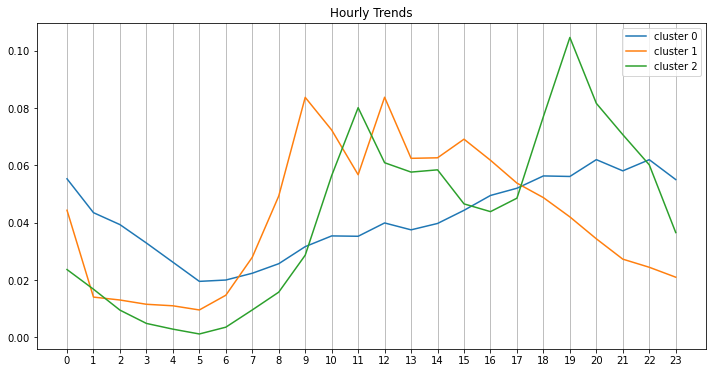

In [ ]:
import matplotlib.pyplot as plt

hourCenters.T.plot(figsize=(12,6))
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'])
plt.title('Hourly Trends')
plt.xticks(hourCenters.columns)
plt.grid(axis='x')
plt.show()

b) Describe the three different hour-of-day trends represented by these three clusters (5 pts).



- Cluster 0: relatively flat curve, gradual increases at daytime and high crime rate at night (20-22 clock).

- Cluster 1: Unstable curve, and high crime rate at morning time (9-12am).

- Cluster 2: High variance and high crime rate at morning (11am) or night (19 clock).


c) Do you notice any consistent trends about which crime types are assigned to which cluster?  Note that by a "crime type", we are referring to specific crimes such as "narcotics" or "assault", not the FBI categories. (5 pts)  



In [ ]:
crimeType = data3[['crime_type']]
crimeType['cluster'] = hour_fit.labels_
crimeType['count'] = 1
crimeType = crimeType.groupby(['cluster', 'crime_type']).count().reset_index()

In [ ]:
# split the crime_type to general types
for i in crimeType.index:
    crimeType.loc[i, 'Type'] = crimeType.loc[i, 'crime_type'].split(':', 1)[0]
crimeType

,cluster,crime_type,count,Type
0,0,ARSON: BY FIRE,1,ARSON
1,0,ASSAULT: AGG PO HANDS NO/MIN INJURY,1,ASSAULT
2,0,ASSAULT: AGGRAVATED: HANDGUN,1,ASSAULT
3,0,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,1,ASSAULT
4,0,ASSAULT: AGGRAVATED: OTHER FIREARM,1,ASSAULT
...,...,...,...,...
114,2,OTHER OFFENSE: PAROLE VIOLATION,1,OTHER OFFENSE
115,2,OTHER OFFENSE: SEX OFFENDER: FAIL TO REGISTER,1,OTHER OFFENSE
116,2,OTHER OFFENSE: VEHICLE TITLE/REG OFFENSE,1,OTHER OFFENSE
117,2,PUBLIC PEACE VIOLATION: RECKLESS CONDUCT,1,PUBLIC PEACE VIOLATION


In [ ]:
# groupby original crime_type

In [ ]:
crimeType[crimeType.cluster==0][['cluster', 'crime_type', 'count']].groupby(['cluster', 'crime_type']).count()

count
cluster crime_type                                          
0       ARSON: BY FIRE                                     1
        ASSAULT: AGG PO HANDS NO/MIN INJURY                1
        ASSAULT: AGGRAVATED: HANDGUN                       1
        ASSAULT: AGGRAVATED: OTHER DANG WEAPON             1
        ASSAULT: AGGRAVATED: OTHER FIREARM                 1
...                                                      ...
        THEFT: OVER $500                                   1
        THEFT: PURSE-SNATCHING                             1
        WEAPONS VIOLATION: RECKLESS FIREARM DISCHARGE      1
        WEAPONS VIOLATION: UNLAWFUL POSS OF HANDGUN        1
        WEAPONS VIOLATION: UNLAWFUL USE HANDGUN            1

[62 rows x 1 columns]

In [ ]:
crimeType[crimeType.cluster==1][['cluster', 'crime_type', 'count']].groupby(['cluster', 'crime_type']).count()

count
cluster crime_type                                               
1       ASSAULT: PRO EMP HANDS NO/MIN INJURY                    1
        ASSAULT: SIMPLE                                         1
        BATTERY: AGG: HANDS/FIST/FEET NO/MINOR INJURY           1
        BATTERY: PRO EMP HANDS NO/MIN INJURY                    1
        BURGLARY: FORCIBLE ENTRY                                1
        BURGLARY: UNLAWFUL ENTRY                                1
        CRIMINAL TRESPASS: TO STATE SUP LAND                    1
        DECEPTIVE PRACTICE: ATTEMPT - FINANCIAL IDENTIT...      1
        DECEPTIVE PRACTICE: BOGUS CHECK                         1
        DECEPTIVE PRACTICE: COUNTERFEIT CHECK                   1
        DECEPTIVE PRACTICE: CREDIT CARD FRAUD                   1
        DECEPTIVE PRACTICE: FINANCIAL IDENTITY THEFT $3...      1
        DECEPTIVE PRACTICE: FINANCIAL IDENTITY THEFT OV...      1
        DECEPTIVE PRACTICE: FORGERY                             1
        DECEPTIVE PRACTICE: FRAUD OR CONFIDENCE GAME            1
        DECEPTIVE PRACTICE: ILLEGAL USE CASH CARD               1
        NARCOTICS: FOUND SUSPECT NARCOTICS                      1
        OFFENSE INVOLVING CHILDREN: CHILD ABDUCTION             1
        OFFENSE INVOLVING CHILDREN: CHILD ABUSE                 1
        OTHER OFFENSE: ANIMAL ABUSE/NEGLECT                     1
        OTHER OFFENSE: HARASSMENT BY ELECTRONIC MEANS           1
        OTHER OFFENSE: HARASSMENT BY TELEPHONE                  1
        OTHER OFFENSE: OTHER CRIME AGAINST PERSON               1
        OTHER OFFENSE: OTHER CRIME INVOLVING PROPERTY           1
        OTHER OFFENSE: SEX OFFENDER: FAIL REG NEW ADD           1
        OTHER OFFENSE: TELEPHONE THREAT                         1
        PUBLIC PEACE VIOLATION: BOMB THREAT                     1
        SEX OFFENSE: PUBLIC INDECENCY                           1
        THEFT: ATTEMPT THEFT                                    1
        THEFT: FROM BUILDING                                    1
        THEFT: POCKET-PICKING                                   1
        THEFT: RETAIL THEFT                                     1

In [ ]:
crimeType[crimeType.cluster==2][['cluster', 'crime_type', 'count']].groupby(['cluster', 'crime_type']).count()

count
cluster crime_type                                               
2       CRIMINAL TRESPASS: TO LAND                              1
        DECEPTIVE PRACTICE: COUNTERFEITING DOCUMENT             1
        GAMBLING: GAME/DICE                                     1
        INTERFERENCE WITH PUBLIC OFFICER: OBSTRUCTING I...      1
        NARCOTICS: MANU/DEL:CANNABIS 10GM OR LESS               1
        NARCOTICS: MANU/DEL:CANNABIS OVER 10 GMS                1
        NARCOTICS: MANU/DELIVER: HEROIN (WHITE)                 1
        NARCOTICS: MANU/DELIVER:CRACK                           1
        NARCOTICS: POSS: CANNABIS 30GMS OR LESS                 1
        NARCOTICS: POSS: CANNABIS MORE THAN 30GMS               1
        NARCOTICS: POSS: CRACK                                  1
        NARCOTICS: POSS: HEROIN(WHITE)                          1
        NARCOTICS: POSS: PCP                                    1
        NARCOTICS: POSS: SYNTHETIC DRUGS                        1
        NARCOTICS: POSSESSION OF DRUG EQUIPMENT                 1
        NARCOTICS: SOLICIT NARCOTICS ON PUBLICWAY               1
        OFFENSE INVOLVING CHILDREN: OTHER OFFENSE               1
        OTHER OFFENSE: GUN OFFENDER: ANNUAL REGISTRATION        1
        OTHER OFFENSE: GUN OFFENDER: DUTY TO REGISTER           1
        OTHER OFFENSE: LICENSE VIOLATION                        1
        OTHER OFFENSE: PAROLE VIOLATION                         1
        OTHER OFFENSE: SEX OFFENDER: FAIL TO REGISTER           1
        OTHER OFFENSE: VEHICLE TITLE/REG OFFENSE                1
        PUBLIC PEACE VIOLATION: RECKLESS CONDUCT                1
        WEAPONS VIOLATION: UNLAWFUL USE OTHER DANG WEAPON       1

In [ ]:
# groupby splited general types

In [ ]:
crimeType[crimeType.cluster==0][['cluster', 'Type', 'count']].groupby(['cluster', 'Type']).count()

count
cluster Type                                   
0       ARSON                                 1
        ASSAULT                               5
        BATTERY                              11
        BURGLARY                              2
        CRIM SEXUAL ASSAULT                   2
        CRIMINAL DAMAGE                       5
        CRIMINAL TRESPASS                     2
        DECEPTIVE PRACTICE                    2
        HOMICIDE                              1
        INTERFERENCE WITH PUBLIC OFFICER      1
        LIQUOR LAW VIOLATION                  1
        MOTOR VEHICLE THEFT                   3
        NARCOTICS                             2
        OFFENSE INVOLVING CHILDREN            1
        OTHER OFFENSE                         4
        PROSTITUTION                          1
        ROBBERY                               9
        SEX OFFENSE                           2
        STALKING                              1
        THEFT                                 3
        WEAPONS VIOLATION                     3

In [ ]:
crimeType[crimeType.cluster==1][['cluster', 'Type', 'count']].groupby(['cluster', 'Type']).count()

count
cluster Type                             
1       ASSAULT                         2
        BATTERY                         2
        BURGLARY                        2
        CRIMINAL TRESPASS               1
        DECEPTIVE PRACTICE              9
        NARCOTICS                       1
        OFFENSE INVOLVING CHILDREN      2
        OTHER OFFENSE                   7
        PUBLIC PEACE VIOLATION          1
        SEX OFFENSE                     1
        THEFT                           4

In [ ]:
crimeType[crimeType.cluster==2][['cluster', 'Type', 'count']].groupby(['cluster', 'Type']).count()

count
cluster Type                                   
2       CRIMINAL TRESPASS                     1
        DECEPTIVE PRACTICE                    1
        GAMBLING                              1
        INTERFERENCE WITH PUBLIC OFFICER      1
        NARCOTICS                            12
        OFFENSE INVOLVING CHILDREN            1
        OTHER OFFENSE                         6
        PUBLIC PEACE VIOLATION                1
        WEAPONS VIOLATION                     1

According to the groupby results:

- Most BATTERY, ASSAULT, WEAPONS VIOLATION,  
and all CRIM SEXUAL ASSAULT, CRIMINAL DAMAGE, HOMICIDE, LIQUOR LAW VIOLATION, MOTOR VEHICLE THEFT, PROSTITUTION, ROBBERY are assigned to cluster 0.

- Most DECEPTIVE PRACTICE is assigned to cluster 1.

- Most NARCOTICS and all GAMBLING are assigned to cluster 2.

d) Do the three clusters have different day-of-week trends?  Again, visualize the trends for each cluster by creating a line graph and discuss any notable differences.  (5 pts)



In [ ]:
col = data3.columns.tolist()[2:9]
col

['day_Sun', 'day_Mon', 'day_Tue', 'day_Wed', 'day_Thu', 'day_Fri', 'day_Sat']

In [ ]:
dayOfWeek = data3[col]
dayOfWeek['cluster'] = hour_fit.labels_
dayOfWeek.head()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,cluster
0,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0
1,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,0
2,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,0
3,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000,0
4,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275,0


In [ ]:
dayOfWeek_mean = dayOfWeek.groupby(['cluster']).mean()
dayOfWeek_mean.head()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat
cluster,,,,,,,
0,0.148470,0.136419,0.138276,0.135211,0.135908,0.149864,0.155851
1,0.109852,0.152216,0.154855,0.152247,0.154611,0.152761,0.123458
2,0.120514,0.146815,0.152620,0.145279,0.143273,0.161674,0.129824


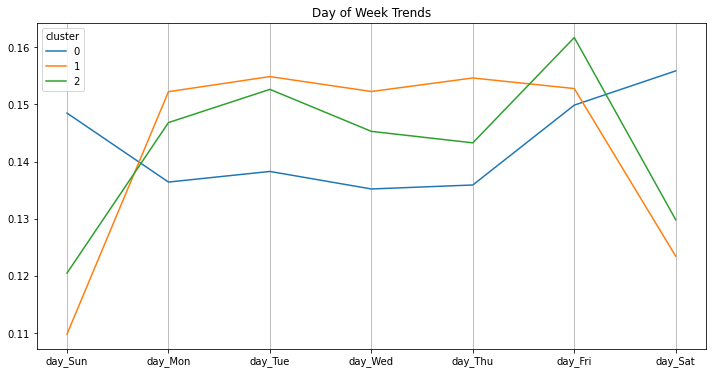

In [ ]:
dayOfWeek_mean.T.plot(figsize=(12,6))
plt.title('Day of Week Trends')
plt.grid(axis='x')
plt.show()

- Cluster 0: relatively flat curve, high crime rate at weekend.

- Cluster 1: high crime rate during weekdays.

- Cluster 2: high crime rate during weekdays, and highest at friday.

e) Do the three clusters affect different types of communities/neighborhoods?  To answer this question, you could first compute the proportions of "cluster 1", "cluster 2", and "cluster 3" crimes for each community area, and identify particular community areas with disproportionate amounts of a given cluster.  You can then use the provided file (HW3Q3_2.csv), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.).  You may also wish to consult the Chicago Community Areas map at https://en.wikipedia.org/wiki/Community_areas_in_Chicago. (5 pts)



In [ ]:
col = data3.columns.tolist()[33:111]
col

['community_area_1',
 'community_area_2',
 'community_area_3',
 'community_area_4',
 'community_area_5',
 'community_area_6',
 'community_area_7',
 'community_area_8',
 'community_area_9',
 'community_area_10',
 'community_area_11',
 'community_area_12',
 'community_area_13',
 'community_area_14',
 'community_area_15',
 'community_area_16',
 'community_area_17',
 'community_area_18',
 'community_area_19',
 'community_area_20',
 'community_area_21',
 'community_area_22',
 'community_area_23',
 'community_area_24',
 'community_area_25',
 'community_area_26',
 'community_area_27',
 'community_area_28',
 'community_area_29',
 'community_area_30',
 'community_area_31',
 'community_area_32',
 'community_area_33',
 'community_area_34',
 'community_area_35',
 'community_area_36',
 'community_area_37',
 'community_area_38',
 'community_area_39',
 'community_area_40',
 'community_area_41',
 'community_area_42',
 'community_area_43',
 'community_area_44',
 'community_area_45',
 'community_area_46

In [ ]:
data4.shape

(77, 12)

In [ ]:
area = data3[col]
area['cluster'] = hour_fit.labels_
area.head()

,community_area_1,community_area_2,community_area_3,community_area_4,community_area_5,community_area_6,community_area_7,community_area_8,community_area_9,community_area_10,...,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77,cluster
0,0.005666,0.008499,0.002833,0.000000,0.000000,0.005666,0.011331,0.002833,0.000,0.000000,...,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833,0
1,0.014815,0.011111,0.014815,0.003704,0.003704,0.018519,0.003704,0.011111,0.000,0.007407,...,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407,0
2,0.009107,0.009457,0.006655,0.003152,0.002102,0.003152,0.001751,0.010158,0.000,0.002102,...,0.031524,0.013310,0.042732,0.002102,0.017863,0.000000,0.012259,0.002102,0.003152,0
3,0.014000,0.011000,0.014000,0.003000,0.006000,0.012000,0.004000,0.021000,0.001,0.002000,...,0.030000,0.014000,0.037000,0.003000,0.010000,0.002000,0.002000,0.003000,0.006000,0
4,0.000000,0.009804,0.000000,0.009804,0.009804,0.019608,0.000000,0.000000,0.000,0.009804,...,0.019608,0.009804,0.019608,0.000000,0.000000,0.000000,0.009804,0.000000,0.000000,0


In [ ]:
area = area.groupby(['cluster']).mean()
area.head()

,community_area_1,community_area_2,community_area_3,community_area_4,community_area_5,community_area_6,community_area_7,community_area_8,community_area_9,community_area_10,...,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.014157,0.012960,0.013336,0.007028,0.004159,0.019003,0.010110,0.025488,0.000700,0.003366,...,0.026600,0.027975,0.009649,0.028715,0.002880,0.010890,0.001644,0.006958,0.007621,0.007001
1,0.014644,0.013036,0.016415,0.010243,0.007042,0.026571,0.017175,0.054369,0.001943,0.007321,...,0.018614,0.022340,0.009610,0.024153,0.004405,0.011017,0.003430,0.009028,0.015258,0.012491
2,0.008103,0.006962,0.008306,0.003433,0.001246,0.009630,0.002365,0.015055,0.000369,0.001628,...,0.036905,0.029450,0.002773,0.033653,0.001624,0.011502,0.001110,0.007608,0.000887,0.002073


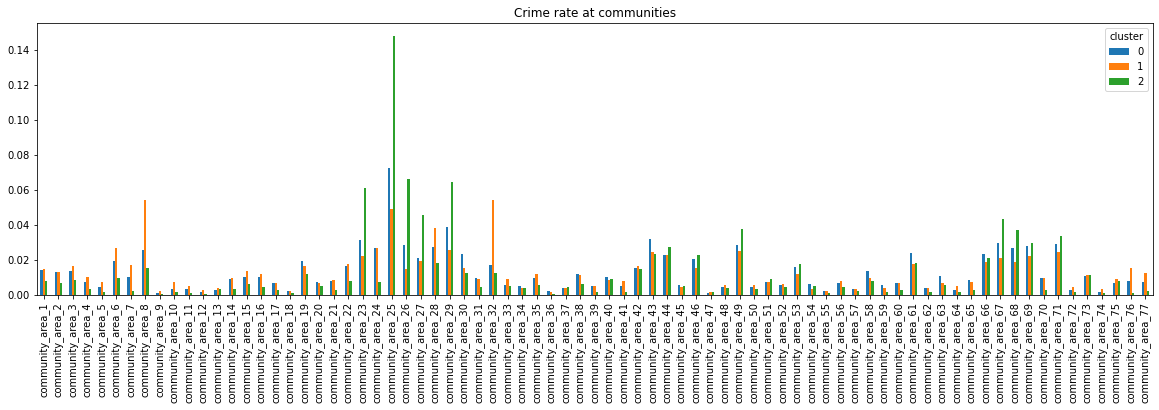

In [ ]:
area.T.plot.bar(figsize=(20,5))
plt.title('Crime rate at communities')
plt.show()

In [ ]:
# out of proportion — either too large or too small

In [ ]:
area.quantile([0.05, 0.95], axis=1) # 5%, 95%

cluster,0,1,2
0.05,0.001912,0.001990,0.000872
0.95,0.029989,0.028918,0.048808


In [ ]:
for i in area.index:
    print('Cluster %d Outliers:' % i)
    a, b = area.iloc[i].quantile([0.05, 0.95]) # get thresholds
    
    print('Too small: ')
    for j in area.columns:
        if area.loc[i, j] < a:
            print('%s %f' % (j, area.loc[i, j]))
    
    print('Too large: ')
    for j in area.columns:
        if area.loc[i, j] >= b:
            print('%s %f' % (j, area.loc[i, j]))
    print('')

Cluster 0 Outliers:
Too small: 
community_area_9 0.000700
community_area_12 0.001643
community_area_47 0.001126
community_area_74 0.001644
Too large: 
community_area_23 0.031129
community_area_25 0.072720
community_area_29 0.038658
community_area_43 0.031946

Cluster 1 Outliers:
Too small: 
community_area_9 0.001943
community_area_36 0.001581
community_area_47 0.001563
community_area_55 0.001868
Too large: 
community_area_8 0.054369
community_area_25 0.048935
community_area_28 0.038305
community_area_32 0.054322

Cluster 2 Outliers:
Too small: 
community_area_9 0.000369
community_area_12 0.000474
community_area_36 0.000543
community_area_55 0.000816
Too large: 
community_area_23 0.061080
community_area_25 0.148117
community_area_26 0.065950
community_area_29 0.064284



In [ ]:
# cluster 0 -- small outlier communities
data4[data4['Community Area Number'].isin([9, 12, 47, 74])]

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
8,9,Edison Park,1125542.283,1945199.392,1.1,3.3,6.5,7.4,35.3,40959,4.794521,283
11,12,Forest Glen,1141967.196,1939560.716,1.1,7.5,6.8,4.9,40.5,44164,4.427736,535
46,47,Burnside,1185110.214,1844340.605,6.8,33.0,18.6,19.3,42.7,12515,13.632719,370
73,74,Mount Greenwood,1154848.722,1832033.633,1.0,3.4,8.7,4.3,36.8,34381,5.207486,561


Cluster 0 - lower crime rate communities : 

lower percent of housing crowded(all under 7%), lower percents of poverty, unemployed and less-uneducated poeple (most under 10%).

In [ ]:
# cluster 1 -- small outlier communities
data4[data4['Community Area Number'].isin([9, 36, 47, 55])]

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
8,9,Edison Park,1125542.283,1945199.392,1.1,3.3,6.5,7.4,35.3,40959,4.794521,283
35,36,Oakland,1182513.802,1879411.798,1.3,39.7,28.7,18.4,40.4,19252,12.974790,643
46,47,Burnside,1185110.214,1844340.605,6.8,33.0,18.6,19.3,42.7,12515,13.632719,370
54,55,Hegewisch,1199718.163,1818873.475,3.3,17.1,9.6,19.2,42.9,22677,8.415329,545


Cluster 1 - lower crime rate communities : 

lower percent of housing crowded(all under 7%).

In [ ]:
# cluster 2 -- small outlier communities
data4[data4['Community Area Number'].isin([9, 12, 36, 55])]

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
8,9,Edison Park,1125542.283,1945199.392,1.1,3.3,6.5,7.4,35.3,40959,4.794521,283
11,12,Forest Glen,1141967.196,1939560.716,1.1,7.5,6.8,4.9,40.5,44164,4.427736,535
35,36,Oakland,1182513.802,1879411.798,1.3,39.7,28.7,18.4,40.4,19252,12.974790,643
54,55,Hegewisch,1199718.163,1818873.475,3.3,17.1,9.6,19.2,42.9,22677,8.415329,545


Cluster 2 - lower crime rate communities : 

lower percent of housing crowded(all under 4%), lower percents of unemployed poeple (most under 10%).

In [ ]:
# cluster 0 -- larger outlier communities
data4[data4['Community Area Number'].isin([23, 25, 49, 43])]

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
22,23,Humboldt park,1151216.159,1906926.141,14.8,33.9,17.3,35.4,38.0,13781,15.839488,7522
24,25,Austin,1140839.462,1903174.321,6.3,28.6,22.6,24.4,37.9,15957,14.188517,15719
42,43,South Shore,1191640.433,1856742.384,2.8,31.1,20.0,14.0,35.7,19398,18.541882,7673
48,49,Roseland,1178008.418,1835643.647,2.5,19.8,20.3,16.9,41.2,17949,13.331469,6412


Cluster 0 - higher crime rate communities : 

Higher percent of poverty, unemployed and less-unedcated poeple (most above 20%).

In [ ]:
# cluster 1 -- larger outlier communities
data4[data4['Community Area Number'].isin([8, 25, 28, 32])]

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
7,8,Near North Side,1175512.220,1906089.147,1.9,12.9,7.0,2.5,22.6,88669,17.077160,9847
24,25,Austin,1140839.462,1903174.321,6.3,28.6,22.6,24.4,37.9,15957,14.188517,15719
27,28,Near West Side,1167030.371,1898359.955,3.8,20.6,10.7,9.6,22.2,44689,11.790159,8891
31,32,Loop,1176373.765,1899831.267,1.5,14.7,5.7,3.1,13.5,65526,24.629080,8471


Cluster 1 - higher crime rate communities : 

Higher percent of poverty poeple.

In [ ]:
# cluster 2 -- larger outlier communities
data4[data4['Community Area Number'].isin([23, 25, 26, 29])]

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
22,23,Humboldt park,1151216.159,1906926.141,14.8,33.9,17.3,35.4,38.0,13781,15.839488,7522
24,25,Austin,1140839.462,1903174.321,6.3,28.6,22.6,24.4,37.9,15957,14.188517,15719
25,26,West Garfield Park,1148754.852,1898785.758,9.4,41.7,25.8,24.5,43.6,10934,27.504936,5340
28,29,North Lawndale,1152306.328,1892568.863,7.4,43.1,21.2,27.6,42.7,12034,21.888178,8073


Cluster 2 - higher crime rate communities : 

Higher percent of poverty, unemployed and less-unedcated poeple (most above 20%).


f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes? (5 pts)

In [ ]:
category = data3[['Category']]
category['cluster'] = hour_fit.labels_
category['count'] = 1
category.groupby(['cluster', 'Category']).count()

count
cluster Category       
0       P1P           9
        P1V          24
        P2           29
1       P1P           6
        P2           26
2       P2           25

The hour-of-day clustering results fairly correspond to the FBI’s crime division.

- All P1V violent crimes are assigned to cluster 0.
- P1P property crimes are assigned to cluster 0 and luster 1.
- P2 less serioes crimes are evenly assigned to all three clusters. 

It may means that violent crimes have stronger hour-of-day feature but less serious crimes don't.